# Support Vector Machine vs Random Forest in Binary Classification of Bitcoin Buy vs Sell Signals

 Technical Analysis is a difficult and tumultuous process where traders analyze a variety of signals to do with trend, momentum, volatility, and volume of assets. Considering the large number of indicators that play a role in this process, the problem can be viewed from a ML perspective. One can take each indicator as a feature and use it to classify buy or sell signals, forming a binary classification problem. In this investigation, I aim to approach technical analysis of Bitcoin(BTC), an asset that traders find great difficulty in predicting, through this approach.The two methods I have chosen are the Support Vector Machine(SVM) and the Random Forest(RF) algorithm. The rationale for choosing these two methods is that they are suitable for binary classification since they both attempt to 'split' the data in their own way. SVM makes use of a hyperplane whilst RF uses splitting conditions on decision trees. Through this investigation, I aim to compare and contrast the performance of both models using Bitcoin and the trading indicators that are applicable to it. Before we dive into that, let's take a deeper look into how both models work.

## Support Vector Machine

 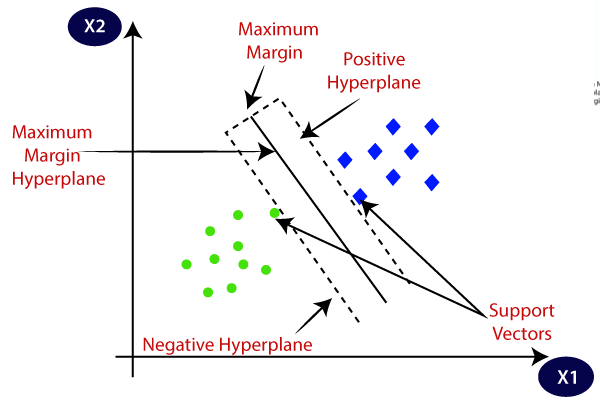 
 (Christopher, A. (2022, January 1). Support Vector Machine - DataDrivenInvestor. Medium. https://medium.datadriveninvestor.com/support-vector-machine-a37d1684d7b1)

SVM aims to classify data by seperating it using a line known as the hyperplane. On each side of the line there are two support vectors. In order for an SVM model to fit data, it aims to maximize the margin (distance between the support vectors) whilst minimizing the loss function, which gives the following optimization problem in primal form:

$$
\frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (\mathbf{w} \cdot \mathbf{x}_i + b))
$$

Where C is the regularization parameter, this value determines the balance between minimizing the loss and maximizing the margin. We can differentiate this formula with respect to the weight and the bias, giving us a system of equations that we substitute to return the dual form of this equation which only contains the lagrange multipliers. 


$$
-\left( \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \right)
$$

This objective function is then subjected to the constraints:

$$
0 \leq \alpha_i \leq C, \quad \forall i
$$

$$
\sum_{i=1}^{n} \alpha_i y_i = 0
$$

Where 
$$
(\mathbf{x}_i, \mathbf{x}_j)
$$

Defines the inner products of the data. This refers to the 2D matrix containing the dot procuts of each data point with all of the other data points. 

This converts the maximization problem in the primal form to a minimization problem that is suitable for a quadratic program solver. Once the optimized parameters are found, the hyperplane can then be used for making predictions about the classification of values.  Since not all classes will be seperable by a hyperplane in their linear form, a kernel function is used to move them into a higher dimension where they can be seperable. If you look closely at the dual form, you can see that it is the inner products of the datapoints that we need. Therefore, the kernel function will move the inner products to a higher dimension where they can be linearly seperated. In this investigation, we will be choosing between four different kernel functions:

Linear Kernel:

   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j
   $$

Polynomial Kernel 

   
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d
   $$

Where c is the constant to add and d is the degree to raise the function to 

Radial Basis Function Kernel

   
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{2\sigma^2}\right)
   $$
   
   Where sigma is the constant determining the influence of each training sample
    
    
 Sigmoid Kernel 

   
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \tanh\left(\alpha (\mathbf{x}_i \cdot \mathbf{x}_j) + c\right)
   $$
   
   Where alpha is the constant determining the functions steepness
   
   In this investigation, the constants will be determined by RandomizedSearchCV for each of the kernels



## Random Forest 

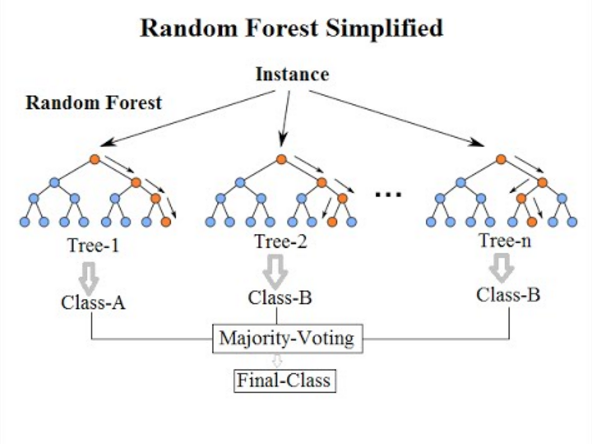

Koehrsen, W. (2020, August 18). Random Forest Simple explanation - Will Koehrsen - medium. Medium. https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d

RF is known as a forest because it uses multiple copies of the decision tree algorithm. In the decision tree algorithm, the goal is to split the data samples by their classifications along a set of leaf nodes at the bottom of the tree. When fitting data, the algorithm aims to determine the best split by iterating over all possible splits and finding the one which best seperates the data. There are multiple criterion that are used to determine the best split. For the purpose of this investigation, we will use the gini criterion, defined below:


$$
Gini(D) = 1 - \sum_{k=1}^{K} p_k^2
$$

Where:
- \( D \) is the dataset on the node.
- \( K \) is the total number of classifictations.
- \( p_k \) is the proportion of samples belonging to a specific class \( k \) on the node, essentially noting the probability of that classification appearing on the node.

To find the best split for one decision node into two child nodes, we want to use this coefficient and determine a information gain(IG) value, defined as:


$$
IG(D, A) = Gini(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} Gini(D_v)
$$

Where:

- \( D \) is the original dataset.
- \( A \) is the attribute used for the split.
- \( v \) represents each possible value of attribute \( A \).
- \( D_v \) a child note produed by the split of \( D \) when the attribute \( A \) has value \( v \).
- \( |D| \) is the total number of samples in the dataset.
- \( |D_v| \) is the number of samples in each subset \( D_v \).

Out of all the iterations conducting during a fit, the best split is determined by the split that produces the maximum value for the information gain.



The splits are determined by bootstrapping the data to pass into the decision trees. Once the fitting is done, each leaf node on each tree will have a specific class assigned to it. For predicting the class of a new data sample, the sample gets passed through each decision tree and based on the specific criterion of each tree, it will land on a leaf node that will give the value predicted by the tree.The classification of the new sample is then predicted by the majority of the trees. 



## Code 

Now that we have understood the theory behind each model, let's begin the investigation. This will follow the process outlined below:

 1. Data Setup (Defining features and classifications, splitting the data into in-sample and out-of-sample  as well as scaling data)
 2. Model Setup (Hypertuning the models)
 3. Fitting and Predicting  
 4. Evaluation 




## Imports 
### Below is the set of methods we will require in this investigation

In [1]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
import talib 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## Data Setup 

 1- Load a Pandas dataframe of BTC-USD Data from 2017 to 2024 

 2- Using this data, we will calculate the return on bitcoin, one of the features for our sample data. We will then store it in a column

 3- We will then create a new column called Signal. This column will store 1 (Buy signal) if the return for the next day is positive. Otherwise, it will store 0 (Sell signal). We are using daily data since this is the highest frequency data available on yFinance


In [2]:
btc_price_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-31", interval="1d") 
btc_price_data['Returns'] = np.asarray(btc_price_data['Close'].pct_change())
btc_price_data['Signal'] = np.where(btc_price_data['Returns'].shift(-1)>0,1,0)

[*********************100%***********************]  1 of 1 completed


## Feature Setup

 As mentioned before, the technical analysis indicators will be used as features of our data-set. We will add these values to our data set. 

#### Momentum Indicators: Momentum indicators tell us the speed and size of a trend in the market, these include:
  - Relative Strength Index(RSI) - The ratio of average gains over average losses in a given period of time
  - Average Directional Index (ADX)- The strength of a market trend regardless of its direction over a given period of time
  - Rate of Change (ROC) - The ratio of the current price to the price 'n periods ago 

In [3]:
btc_price_data['14 Day RSI'] = talib.RSI(btc_price_data['Close'],timeperiod=14) 
btc_price_data['14 Day ADX'] = talib.ADX(btc_price_data['High'],btc_price_data['Low'],btc_price_data['Close'],timeperiod=14) 
btc_price_data['14 Day ROC'] = talib.ROC(btc_price_data['Close'], timeperiod=14)

## Trend Indicators

 Trend indicators determine whether BTC price is trending upward or downward in a given period. These include:

 - Standard Moving Average (SMA) - The average of the price in a given time period

 - Exponential Moving Average (EMA) -The same as SMA except that more weighting is given to more recent prices 

These indicators will be taken over a long term period (50 Days), a middle period (25 days), and a short term period (5 days) 


In [4]:

btc_price_data['5 Day SMA'] = talib.SMA(btc_price_data['Close'], timeperiod=5)

btc_price_data['25 Day SMA'] = talib.SMA(btc_price_data['Close'], timeperiod=25)

btc_price_data['50 Day SMA'] = talib.SMA(btc_price_data['Close'], timeperiod=50)



btc_price_data['5 Day EMA'] = talib.EMA(btc_price_data['Close'], timeperiod = 5 )

btc_price_data['25 Day EMA'] = talib.EMA(btc_price_data['Close'], timeperiod = 25 )

btc_price_data['50 Day EMA'] = talib.SMA(btc_price_data['Close'], timeperiod=50)






### Volatility Indicators 

#### Volatility indicators try to measure the dispersion of stock returns for a given asset in a given period, these include:

 - Average True Range (ATR) - Determines a "True Range" based on the maximum out of three different calculations (Current High- Current Low, Current High - Previous Close, Current Low - Previous Close) for each day. It then takes the EMA for a given time period 

 - Bollinger Bands (BBANDs) - Bollinger Bands are a chart indicator that include three lines. One is the SMA for a given time period (Middle Band), one is two standard deviations above the SMA (Upper band), and the last is two standard deviations below the SMA (Lower Band).  The width of the band determines volatility. 


In [5]:
btc_price_data['14 Day ATR'] = talib.ATR(btc_price_data['High'],btc_price_data['Low'],btc_price_data['Close'],timeperiod=14)
upper_band , middle_band, lower_band = talib.BBANDS(btc_price_data['Close'])
btc_price_data['BBands width'] = upper_band - lower_band 



  ### Volume Indicators
 Volume measures how much the stock has been traded or sold in a given time period.  For volume indicator I will use the  exponential moving average of the OBV in 14 days. The OBV measures the flow of volume for a day. If the current closing price is lower than the previous closing price, the current volume is subtracted from the previous OBV. On the other hand, an increase in closing price means the current volume is added to the OBV. This method allows us to see price reversals or confirm trends based on whether or not there is divergence in EMA of price and EMA of volume 

In [6]:
btc_price_data['OBV'] = talib.OBV(btc_price_data['Close'], btc_price_data['Volume'])
btc_price_data['14 Day OBV EMA'] = talib.EMA(btc_price_data['OBV'], timeperiod=14)

### Cleaning and Organizing data

 - The null values are dropped from the data
 - The data is split into in-sample (for fitting and predicting), and out-of-sample (for predicting)
 - The irrelevant data is then removed from the data-set for the samples (X) 
 - The classifications are assigned to the conventional variable y for both in-sample and out-of-sample

In [7]:
btc_price_data = btc_price_data.dropna()
in_sample = btc_price_data.iloc[:-600]
out_of_sample = btc_price_data.iloc[-600:]
X_insample = in_sample.drop(columns=['High','Low','Close','Adj Close','Volume','OBV', 'Signal'])
X_outsample = out_of_sample.drop(columns=['High','Low','Close','Adj Close','Volume','OBV', 'Signal'])
y_insample= in_sample['Signal']
y_outsample = out_of_sample['Signal']






### Splitting and Scaling Data 

 - Train-test-split is used to split the data into samples for hypertuning
 - The in-sample and out-of-sample data is scaled as SVM has a distance-based optimization process for its fit so unscaled datapoints will affect the fit. 


In [8]:
X_train,X_test, y_train, y_test = train_test_split(X_insample,y_insample, test_size=0.3,random_state=42 )
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_insample = scaler.fit_transform(X_insample)
X_outsample = scaler.fit_transform(X_outsample)

# Model Training and Prediction 






## Hypertuning 
For both models, hypertuning will be done by RandomizedSearchCV. Each model will get 5 cross-validations and 1000 iterations to determine the best hyperparameters

In [9]:
svm_param_distributions={
     'C': [0.001, 0.01, 0.1, 1, 10, 100], #Regularization parameter, determines how much weight is given to the loss function for classification vs margin maximizing
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],#Kernel function, each one transforms the data to a seperable form by raising its dimension
    'gamma':['auto','scale'],
    'degree': randint(1,10),#Degree is which degree to raise for the polynomial kernel
    'coef0': [0.0, 0.1, 0.5, 1.0] #Coefficient is which coefficient is best for polynomial and sigmoid kernels
}
rforest_param_distributions = {
    'n_estimators': randint(50,200),  #Number of decision trees to use for classifying
    'max_depth': randint(5, 30),        #Maximum depth of each decision tree
    'min_samples_split': randint(2, 10),  #Minimum number of samples remaining to split the decision tree into another layer
    'min_samples_leaf': randint(1, 10),  #Minimum samples required for a node to be considered a decision node
    'max_features': [ 'sqrt', 'log2'],  #Way of determining the number of features to use for a best split
    'bootstrap': [True, False]           #Whether or not to bootstrap 
}





#Giving 5 cross-validations and running 1000 iterations for each combination
SVM_Model = RandomizedSearchCV(SVC(), svm_param_distributions,cv=5, n_iter=1000, random_state=42)
RForest_Model = RandomizedSearchCV(RandomForestClassifier(), rforest_param_distributions,cv=5, n_iter=1000, random_state=42)

# Fitting and Predicting Data 


In [10]:
X_insample_scaled = scaler.fit_transform(X_insample)

In [11]:
SVM_Model.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=1000,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'coef0': [0.0, 0.1, 0.5, 1.0],
                                        'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbb20030b20>,
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42)

In [32]:
svm_insample_preds = SVM_Model.predict(X_insample_scaled)
svm_outsample_preds= SVM_Model.predict(X_outsample)

In [13]:
RForest_Model.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=1000,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbb20030d30>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbb2003a580>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbb2002f370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbb2002f160>},
                   random_state=42)

In [14]:
svm_insample_preds.sum()

1074

In [33]:
rf_insample_preds = RForest_Model.predict(X_insample_scaled)
rf_outsample_preds = RForest_Model.predict(X_outsample)

# Comparative Analysis   

###  To compare the classification models, we will use the following evaluation methods:

Confusion Matrix: Shows the number of true positives, false positives, true negatives, and false negatives(Note: For this model the buy signal 1 is positive and the sell signal 0 is negative)

#### Classification Report: A report that displays the values outlined below with the example of buy signal guesses:
 
 - Accuracy (Ratio of total correct guesses to total guesses)
 - Precision (Ratio of correct buy signal guesses to total buy signal guesses)
 - Recall (Ratio of correct buy signal guesses to all buy signals)
 - F1 (Harmonic Mean of Precision and Recall)

#### ROC-Curve: Plots the true positives against the false positives at each threshold



### In-Sample Analysis

In [16]:
svm_insample_cm = confusion_matrix(y_insample, svm_insample_preds)
rf_insample_cm = confusion_matrix(y_insample, rf_insample_preds)
svm_insample_cr = classification_report(y_insample, svm_insample_preds)
rf_insample_cr = classification_report(y_insample, rf_insample_preds)




In [17]:
print(svm_insample_cr) 
print(svm_insample_cm)

              precision    recall  f1-score   support

           0       0.65      0.12      0.20       579
           1       0.52      0.94      0.67       599

    accuracy                           0.54      1178
   macro avg       0.59      0.53      0.44      1178
weighted avg       0.59      0.54      0.44      1178

[[ 68 511]
 [ 36 563]]


In [18]:
print(rf_insample_cm)
print(rf_insample_cr)

[[400 179]
 [106 493]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       579
           1       0.73      0.82      0.78       599

    accuracy                           0.76      1178
   macro avg       0.76      0.76      0.76      1178
weighted avg       0.76      0.76      0.76      1178



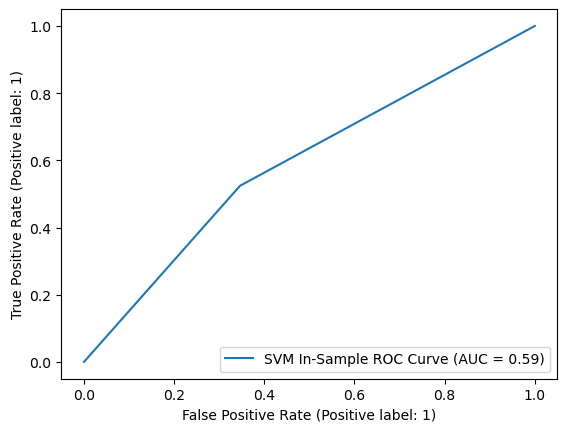

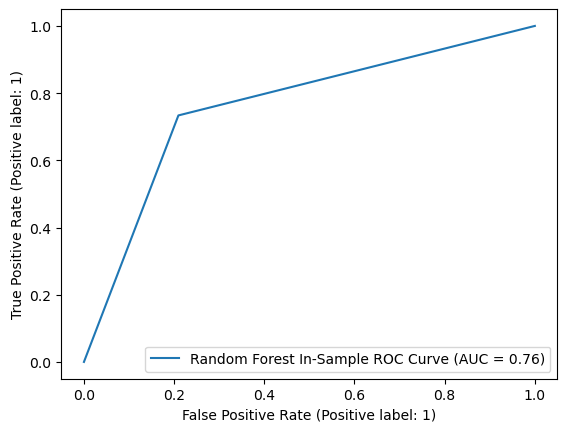

In [19]:
 
RocCurveDisplay.from_predictions(svm_insample_preds, y_insample, name='SVM In-Sample ROC Curve')
RocCurveDisplay.from_predictions(rf_insample_preds, y_insample, name='Random Forest In-Sample ROC Curve')
plt.show()



### In-Sample Evaluation

The F1 Scores for the RandomForest model are noticeably higher than for the SVM model, indicating that it has predicted the data with a greater degree of accuracy. Moreover,the confusion matrix for both variables shows us that the RandomForest model identifies true negatives and true positives more successfully whilst SVM tends to mainly forecast false and true negatives. As a result, we can deduce that the SVM model has too many false sell signals and is more pessimistic about the market. We can also see this through how its precision score for the buy signal is far lower than for the sell signal whilst the RandomForest is balanced across both. The ROC curve gives a clear indication that the RandomForest model is a much more accurate predictor since it has a higher AUC.Altogehter, RandomForest does come out on top here by a significant margin.







### Out of Sample Analysis 

In [38]:
svm_outsample_cm = confusion_matrix(y_outsample, svm_outsample_preds)
rf_outsample_cm = confusion_matrix(y_outsample, rf_outsample_preds)
svm_outsample_cr= classification_report(y_outsample, svm_outsample_preds)
rf_outsample_cr = classification_report(y_outsample, rf_outsample_preds)

In [39]:
print(svm_outsample_cm) 
print(svm_outsample_cr)


[[ 27 265]
 [ 26 282]]
              precision    recall  f1-score   support

           0       0.51      0.09      0.16       292
           1       0.52      0.92      0.66       308

    accuracy                           0.52       600
   macro avg       0.51      0.50      0.41       600
weighted avg       0.51      0.52      0.41       600



In [40]:
print(rf_outsample_cm)
print(rf_outsample_cr)

[[122 170]
 [120 188]]
              precision    recall  f1-score   support

           0       0.50      0.42      0.46       292
           1       0.53      0.61      0.56       308

    accuracy                           0.52       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.52      0.51       600



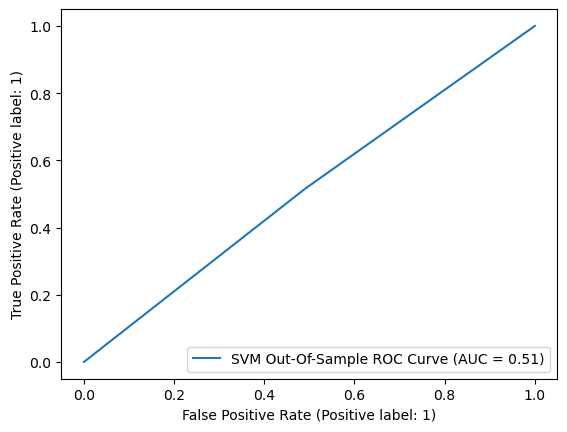

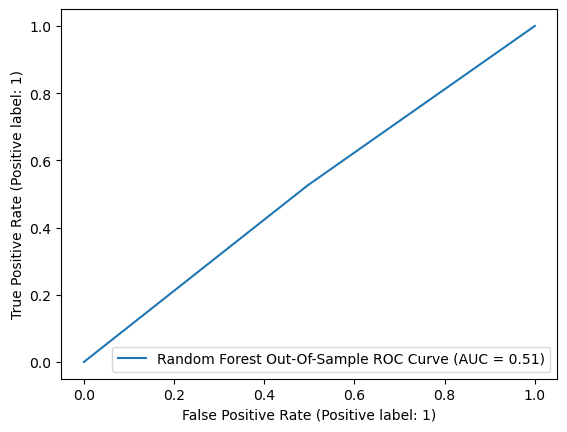

In [37]:

RocCurveDisplay.from_predictions(svm_outsample_preds, y_outsample, name='SVM Out-Of-Sample ROC Curve')
RocCurveDisplay.from_predictions(rf_outsample_preds, y_outsample, name='Random Forest Out-Of-Sample ROC Curve')

### Out-Of-Sample Evaluation

The F1 Scores of the SVM model when attempting to predict the out-of-sample data suggest it has a very low accuracy when predicting sell signals. Looking at the confusion matrices, for the SVM Model there is a decrease in the positive label predictions whilst in the RandomForest model, there is an increase in both false positives and false negatives. Once again, the confusion matrix of the SVM model displays far more negative predictions, reinforcing the pessimistic outlook of the SVM model. This is further supported by the extremely low recall score of the SVM model as it suggests it is predicting far too many sell signals.The precision, and AUC of both the RandomForest and SVM models fall to the low 50s, evidencing a drop in accuracy when dealing with out-of-sample data as they are only able to predict either label half of the time. In this case, there is no clear winner. However, the low F1 and recall scores of SVM suggest that RandomForest has a slight edge



## Profit and Loss (PNL) Graphs 

PNL is the cumulative sum of the returns made using the buy/sell signal for each day of a classification model in a given period. The PNL gives us an indication of how profitable our strategy is. It is calculated by the signal multiplied by the return of the next day. All sell signals are converted from 0 to -1 so that our trading strategy with the model includes both the long and short methods.

### In-Sample PNL

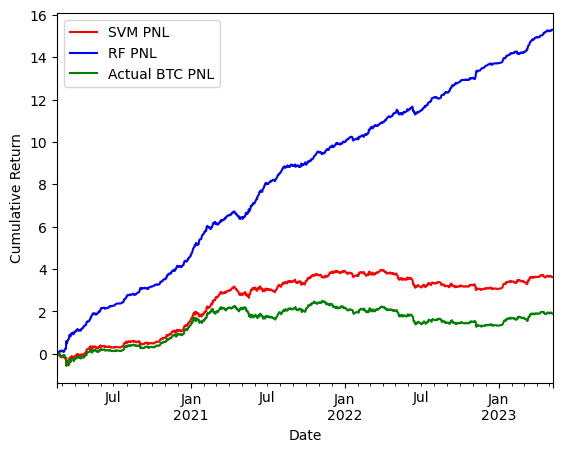

In [41]:
svm_insample_signals = pd.Series(svm_insample_preds, in_sample.index)
rf_insample_signals = pd.Series(rf_insample_preds, in_sample.index)

rf_insample_signals[rf_insample_signals ==0]=-1
svm_insample_signals[svm_insample_signals==0]=-1

svm_insample_pnl = svm_insample_signals.multiply(in_sample['Returns'].shift(-1)).cumsum()
rf_insample_pnl = rf_insample_signals.multiply(in_sample['Returns'].shift(-1)).cumsum()



svm_insample_pnl.plot(label='SVM PNL', color ='Red')
rf_insample_pnl.plot(label= 'RF PNL', color = 'Blue')
in_sample['Returns'].cumsum().plot(label='Actual BTC PNL', color='Green')
plt.ylabel("Cumulative Return")
plt.legend()

We can see that both models have outperformed the PNL of Bitcoin within the in-sample dataset, suggesting they are both profitable. However, the PNL of the RanomForest model has far outperformed the SVM model, reflecting how SVM was hindered by its overly pessimistic approach due to predicting too many sell signals, hence it may have incurred more loss by trying to short too many times whilst RandomForest had a more balanced amount of long and short trades.Looking at the PNL graph, it suggests that RandomForest is much more lucrative

### Out-Sample PNL 

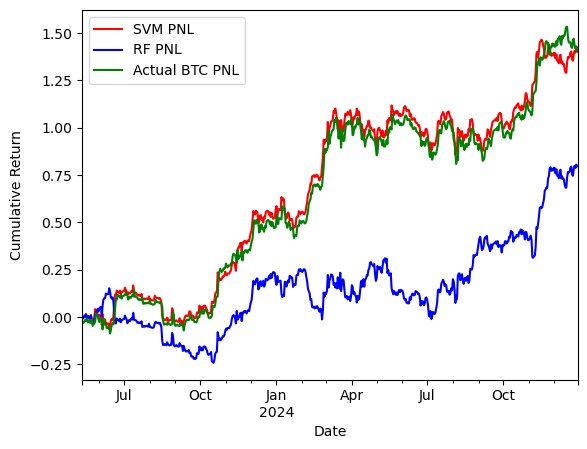

In [45]:
svm_outsample_signals = pd.Series(svm_outsample_preds, y_outsample.index)
rf_outsample_signals = pd.Series(rf_outsample_preds, y_outsample.index)

rf_outsample_signals[rf_outsample_signals==0]=-1
svm_outsample_signals[svm_outsample_signals==0]=-1

svm_outsample_pnl = svm_outsample_signals.multiply(out_of_sample['Returns'].shift(-1)).cumsum()
rf_outsample_pnl = rf_outsample_signals.multiply(out_of_sample['Returns'].shift(-1)).cumsum()

svm_outsample_pnl.plot( label='SVM PNL',  color='Red')
rf_outsample_pnl.plot(label='RF PNL', color = 'Blue')
out_of_sample['Returns'].cumsum().plot(label='Actual BTC PNL', color='Green')
plt.ylabel("Cumulative Return")
plt.legend()


There is an inversion of the trend when looking at the Out-Of-Sample dataset. Both models display a strong PNL that gradually increases across the time period. However, the SVM-Model generates a much higher return and it near perfectly fits the return on Bitcoin itself. On the other hand, the RandomForest model underperforms Bitcoin returns. Overall, this PNL graph contradicts the expected result since SVM had a low F1 and recall score for the sell signal, suggesting it would do worse. Additionaly, despite both of the models having a precision and recall of around 0.5, it is surprising that they are able to produce a consistent profit wiithin this time period. 

### Final Consensus 

All things considered, neither the RandomForest nor the SVM model have produced a convincing trading strategy. The SVM model was overly pessimistic in both the in-sample and out-of-sample datasets, impeding its success. Whilst the RandomForest model did outperform the SVM model significantly in the in-sample dataset, it's accuracy severely plummeted during the out-of-sample dataset, suggesting it had been overfit.It is important to note that biased datasets may have affected the evaluation results. Criterion such as the F1 Score and the AUC can be inflated or deflated by the dataset as the number of buy signals may have outweighed the number of sell signals since Bitcoin overall has had an upward trend in both of the time periods that we have used. Resultantly, the imbalance in the dataset may have caused this issue. Furthermore, for the sake of simplicity  we have only looked at a binary classification of buy/sell signals for a single day, hence the limited scope may have affected the performance of the models. Ultimately, the drop in performance when faced with out-of-sample data and the potential limitations of the metrics used to assess the model have resulted in an inconclusive consensus. 



